<a href="https://colab.research.google.com/github/viveknp59/Lok_sabha-Elections-2024/blob/main/Lok_Sabha_Election_2024_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving election_results_2024.csv to election_results_2024.csv


In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with the name of your uploaded file
df = pd.read_csv('election_results_2024.csv')
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')

# Display the first few rows of the dataframe
df.head()


,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991.0,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282.0,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036.0,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794.0,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559.0,Result Declared


In [ ]:
df.Status.value_counts()

Status
Result Declared    542
Uncontested          1
Name: count, dtype: int64

In [ ]:
df.dropna(inplace=True,ignore_index=True)
df.shape

(542, 8)

In [ ]:
top_candidates = df.nlargest(20, 'Margin')[['Leading Candidate', 'Constituency', 'Margin', 'Leading Party']]
top_candidates

,Leading Candidate,Constituency,Margin,Leading Party
221,SHANKAR LALWANI,INDORE,1175092.0,Bharatiya Janata Party
157,RAKIBUL HUSSAIN,Dhubri,1012476.0,Indian National Congress
525,SHIVRAJ SINGH CHOUHAN,VIDISHA,821408.0,Bharatiya Janata Party
384,C R PATIL,Navsari,773551.0,Bharatiya Janata Party
186,AMIT SHAH,Gandhinagar,744716.0,Bharatiya Janata Party
159,ABHISHEK BANERJEE,Diamond harbour,710930.0,All India Trinamool Congress
513,BIPLAB KUMAR DEB,Tripura West,611578.0,Bharatiya Janata Party
529,DR. HEMANG JOSHI,Vadodara,582126.0,Bharatiya Janata Party
422,BRIJMOHAN AGRAWAL,RAIPUR,575285.0,Bharatiya Janata Party
503,Sasikanth Senthil,TIRUVALLUR,572155.0,Indian National Congress


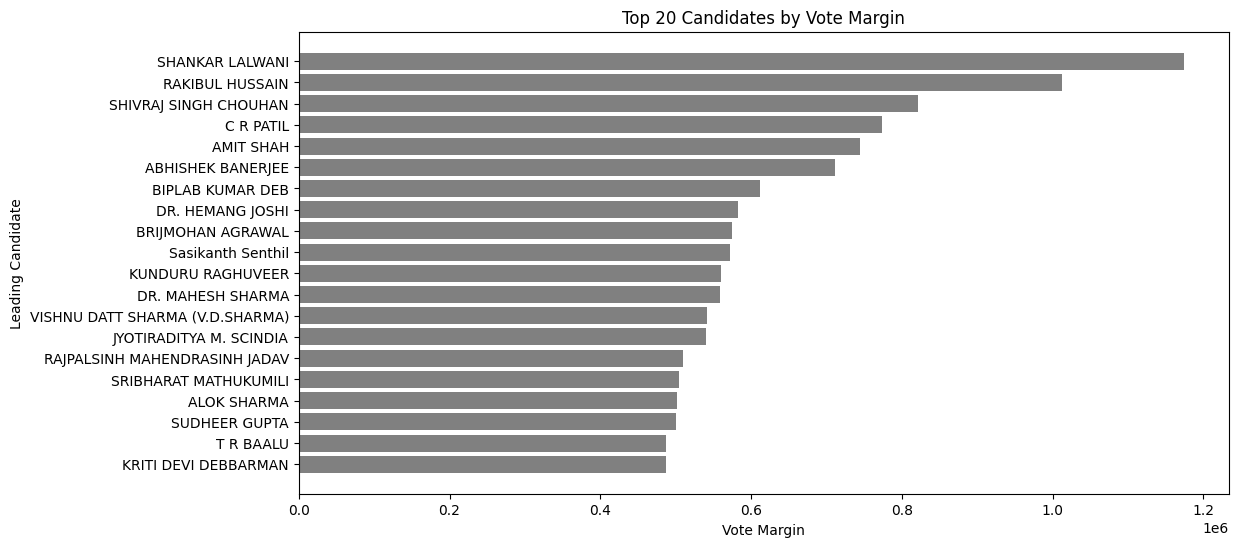

In [ ]:
plt.figure(figsize=(12, 6))
plt.barh(top_candidates['Leading Candidate'], top_candidates['Margin'], color='Grey')
plt.xlabel('Vote Margin')
plt.ylabel('Leading Candidate')
plt.title('Top 20 Candidates by Vote Margin')
plt.gca().invert_yaxis()
plt.show()

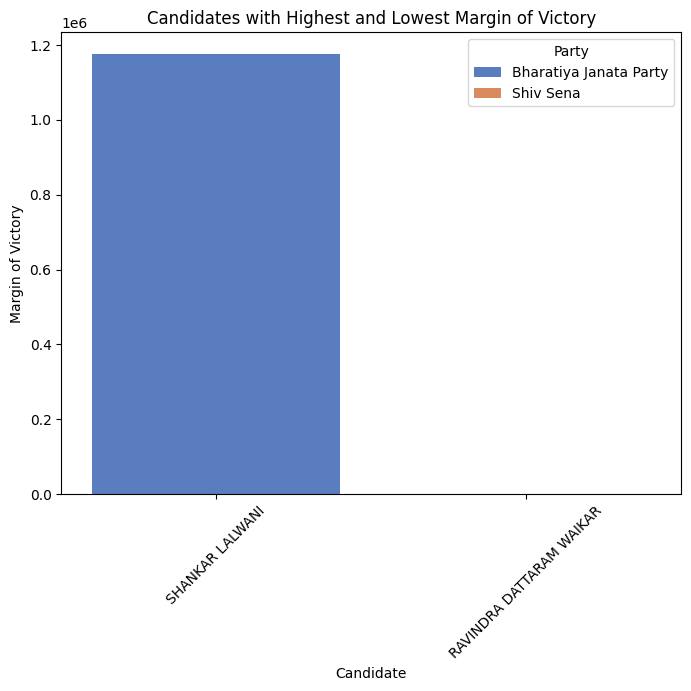

In [ ]:
import seaborn as sns

highest_margin_entry = df.loc[df['Margin'].idxmax()]
lowest_margin_entry = df.loc[df['Margin'].idxmin()]

# Combine the data
data_to_plot = pd.DataFrame({
    'Candidate': [highest_margin_entry['Leading Candidate'], lowest_margin_entry['Leading Candidate']],
    'Party': [highest_margin_entry['Leading Party'], lowest_margin_entry['Leading Party']],
    'Margin': [highest_margin_entry['Margin'], lowest_margin_entry['Margin']]
})

# Plot the comparison
plt.figure(figsize=(8, 6))
sns.barplot(data=data_to_plot, x='Candidate', y='Margin', hue='Party', palette='muted')
plt.title('Candidates with Highest and Lowest Margin of Victory')
plt.xlabel('Candidate')
plt.ylabel('Margin of Victory')
plt.xticks(rotation=45)
plt.show()

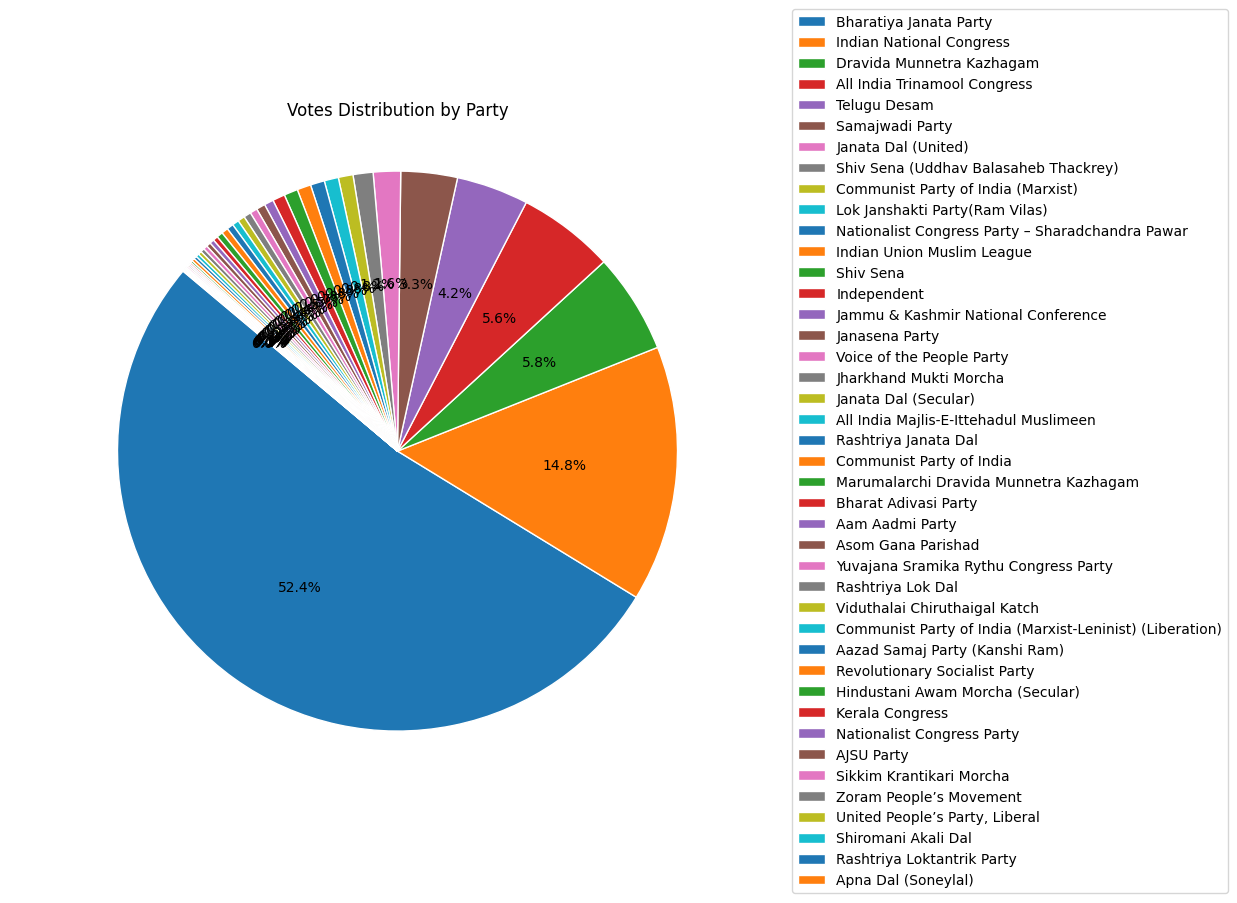

In [ ]:
party_votes = df.groupby('Leading Party')['Margin'].sum().sort_values(ascending=False)

# Plot pie chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(party_votes, labels=None, autopct='%1.1f%%', startangle=140, wedgeprops=dict(edgecolor='w'))
plt.title('Votes Distribution by Party', pad=20)
plt.axis('equal')

plt.legend(labels=party_votes.index, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='medium')


plt.show()

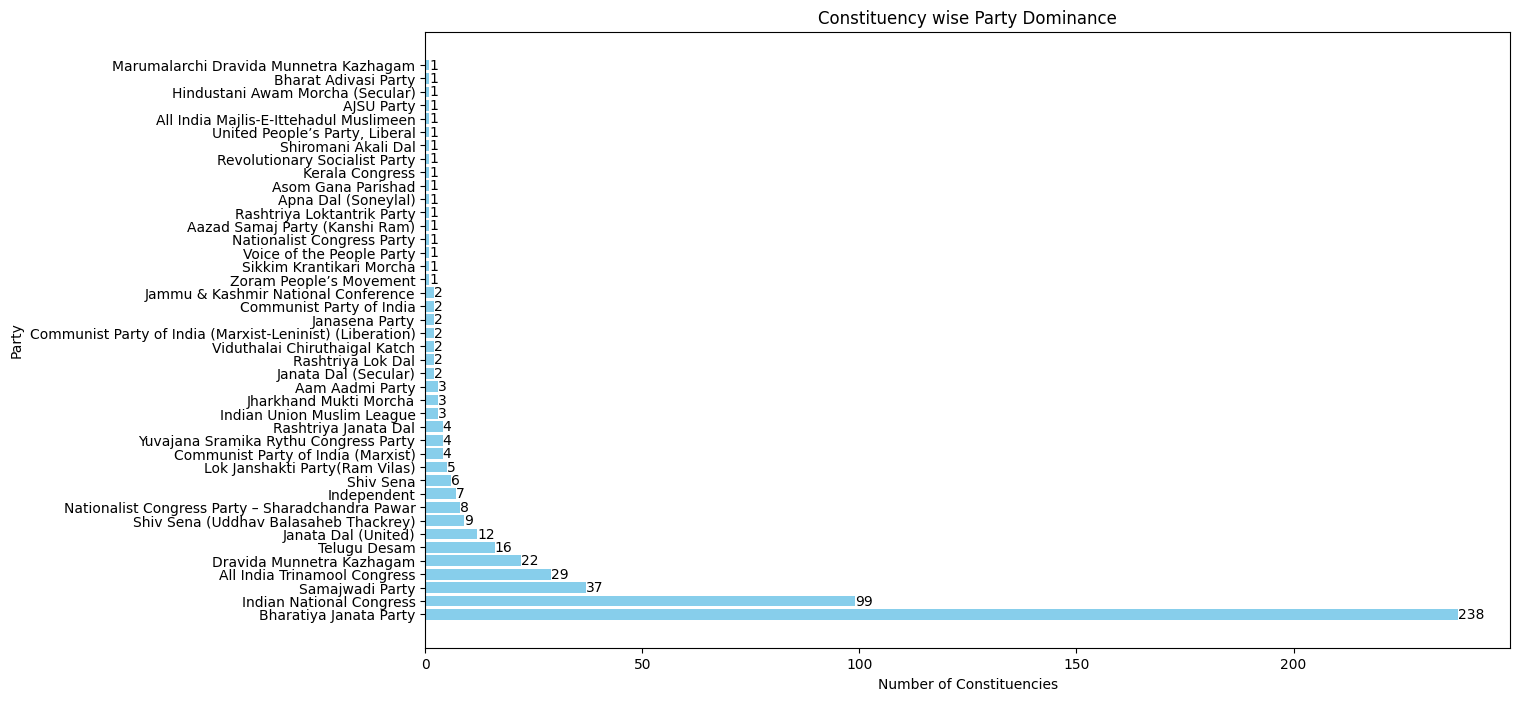

In [ ]:


# Group by State and Leading Party to count the number of seats won by each party in each state
state_party_counts = df.groupby(['Constituency', 'Leading Party']).size().reset_index(name='Seats')

# Pivot the table to have parties as columns and states as rows
state_party_pivot = state_party_counts.pivot(index='Constituency', columns='Leading Party', values='Seats').fillna(0)

# Determine the dominant party in each state
state_party_pivot['Dominant Party'] = state_party_pivot.idxmax(axis=1)

# Plot the dominant party in each state
dominant_party_counts = state_party_pivot['Dominant Party'].value_counts()

plt.figure(figsize=(14, 8))
bars = plt.barh(dominant_party_counts.index, dominant_party_counts.values, color='SkyBlue')

# Add data labels
for bar in bars:
    plt.text(
        bar.get_width(),    # x coordinate for the label
        bar.get_y() + bar.get_height() / 2,    # y coordinate for the label
        f'{int(bar.get_width())}',    # label
        va='center',    # vertical alignment
        ha='left',    # horizontal alignment
        color='black'    # label color
    )

plt.xlabel('Number of Constituencies')
plt.ylabel('Party')
plt.title('Constituency wise Party Dominance')
plt.show()


In [ ]:


# Filter the dataset for close contests where the margin is less than 10,000 votes
close_contests = df[df['Margin'] < 10000]

# Further segregate the data to find the constituencies where BJP or Congress lost by less than 10,000 votes
bjp_close_losses = close_contests[close_contests['Trailing Party'] == 'Bharatiya Janata Party']
congress_close_losses = close_contests[close_contests['Trailing Party'] == 'Indian National Congress']

# Display the close losses for BJP
print("BJP Close Losses:")
print(bjp_close_losses[['Leading Candidate', 'Leading Party', 'Trailing Candidate', 'Constituency', 'Margin']])

# Display the close losses for Congress
print("Congress Close Losses:")
print(congress_close_losses[['Leading Candidate', 'Leading Party', 'Trailing Candidate', 'Constituency', 'Margin']])


BJP Close Losses:
            Leading Candidate  \
33                 BAG MITALI   
89    BAJRANG MANOHAR SONWANE   
125             MANISH TEWARI   
147  PATEL UMESHBHAI BABUBHAI   
155          ANAND BHADAURIYA   
158     BACHHAV SHOBHA DINESH   
207       AJENDRA SINGH LODHI   
460       RAMASHANKAR RAJBHAR   

                                        Leading Party  \
33                       All India Trinamool Congress   
89   Nationalist Congress Party – Sharadchandra Pawar   
125                          Indian National Congress   
147                                       Independent   
155                                   Samajwadi Party   
158                          Indian National Congress   
207                                   Samajwadi Party   
460                                   Samajwadi Party   

                  Trailing Candidate Constituency  Margin  
33                  ARUP KANTI DIGAR     Arambagh  6399.0  
89         PANKAJA GOPINATHRAO MUNDE         Beed 

Based on the above result, we can analyze the close losses for both the Bharatiya Janata Party (BJP) and the Indian National Congress (Congress) in specific constituencies where the trailing margin was less than 10,000 votes.

### Analysis of Close Losses

#### BJP Close Losses

1. **Arambagh**
   - **Leading Candidate**: Bag Mitali (All India Trinamool Congress)
   - **Trailing Candidate**: Arup Kanti Digar (BJP)
   - **Margin**: 6,399 votes
   - **Analysis**: This constituency witnessed a competitive race where the BJP candidate lost to the Trinamool Congress by a narrow margin. Strengthening grassroots outreach and addressing local issues could improve BJP's prospects in future elections.

2. **Beed**
   - **Leading Candidate**: Bajrang Manohar Sonwane (Nationalist Congress Party – Sharadchandra Pawar)
   - **Trailing Candidate**: Pankaja Gopinathrao Munde (BJP)
   - **Margin**: 6,553 votes
   - **Analysis**: Beed saw a close contest between NCP and BJP. With Pankaja Munde being a prominent leader, BJP may focus on consolidating support through local alliances and targeted campaigning.

3. **Chandigarh**
   - **Leading Candidate**: Manish Tewari (Indian National Congress)
   - **Trailing Candidate**: Sanjay Tandon (BJP)
   - **Margin**: 2,504 votes
   - **Analysis**: Manish Tewari’s narrow victory indicates a strong competition. BJP can enhance its presence by addressing urban issues and engaging with the youth and middle-class voters.

4. **Daman & Diu**
   - **Leading Candidate**: Patel Umeshbhai Babubhai (Independent)
   - **Trailing Candidate**: Lalubhai Babubhai Patel (BJP)
   - **Margin**: 6,225 votes
   - **Analysis**: The presence of a strong independent candidate highlights the need for BJP to address specific local concerns and possibly reconsider candidate selection.

5. **Dhaurahra**
   - **Leading Candidate**: Anand Bhadauriya (Samajwadi Party)
   - **Trailing Candidate**: Rekha Verma (BJP)
   - **Margin**: 4,449 votes
   - **Analysis**: Close loss to SP suggests BJP should focus on rural development and caste dynamics in this region.

6. **Dhule**
   - **Leading Candidate**: Bachhav Shobha Dinesh (Indian National Congress)
   - **Trailing Candidate**: Bhamre Subhash Ramrao (BJP)
   - **Margin**: 3,831 votes
   - **Analysis**: BJP needs to counter the Congress’ appeal in Dhule by focusing on local issues and improving its campaign strategy.

7. **Hamirpur**
   - **Leading Candidate**: Ajendra Singh Lodhi (Samajwadi Party)
   - **Trailing Candidate**: Kunwar Pushpendra Singh Chandel (BJP)
   - **Margin**: 2,629 votes
   - **Analysis**: Close competition with SP suggests focusing on improving infrastructure and addressing local grievances.

8. **Salempur**
   - **Leading Candidate**: Ramashankar Rajbhar (Samajwadi Party)
   - **Trailing Candidate**: Ravindar Kushawaha (BJP)
   - **Margin**: 3,573 votes
   - **Analysis**: BJP can work on better connecting with the electorate and addressing specific needs to regain this constituency.

#### Congress Close Losses

1. **Bansgaon**
   - **Leading Candidate**: Kamlesh Paswan (Bharatiya Janata Party)
   - **Trailing Candidate**: Sadal Prasad (Congress)
   - **Margin**: 3,150 votes
   - **Analysis**: Congress’s narrow loss to BJP suggests a need for stronger local engagement and addressing agrarian and rural issues.

2. **Jaipur Rural**
   - **Leading Candidate**: Rao Rajendra Singh (Bharatiya Janata Party)
   - **Trailing Candidate**: Anil Chopra (Congress)
   - **Margin**: 1,615 votes
   - **Analysis**: This very close result indicates that Congress needs to focus on urban development issues and engage more with the youth and middle-class voters in Jaipur Rural.

3. **Kanker**
   - **Leading Candidate**: Bhojraj Nag (Bharatiya Janata Party)
   - **Trailing Candidate**: Biresh Thakur (Congress)
   - **Margin**: 1,884 votes
   - **Analysis**: Congress should address tribal issues and improve their grassroots campaigning to turn this narrow defeat into a victory.

4. **Mahbubnagar**
   - **Leading Candidate**: Aruna D. K (Bharatiya Janata Party)
   - **Trailing Candidate**: Challa Vamshi Chand Reddy (Congress)
   - **Margin**: 4,500 votes
   - **Analysis**: Close competition suggests Congress needs to focus on development issues and local engagement to increase their vote share in Mahbubnagar.

### Conclusion

Both BJP and Congress have constituencies where they lost by narrow margins. These close contests highlight the importance of targeted campaigning, addressing local issues, and improving candidate selection. For BJP, focusing on rural development, local concerns, and better outreach can help recover these seats. For Congress, stronger local engagement, addressing urban and rural development issues, and appealing to youth and middle-class voters could turn narrow defeats into victories in future elections.